In [5]:
# f(x0, x1, x2) = x0x1 xor x1 xor x0x2
# balanced function
for x0 in [0, 1]:
    for x1 in [0, 1]:
        for x2 in [0, 1]:
            print(f"f({x0}, {x1}, {x2}) = {x0*x1 ^ x1 ^ x0*x2}")

f(0, 0, 0) = 0
f(0, 0, 1) = 0
f(0, 1, 0) = 1
f(0, 1, 1) = 1
f(1, 0, 0) = 0
f(1, 0, 1) = 1
f(1, 1, 0) = 0
f(1, 1, 1) = 1


In [6]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile
from qiskit.visualization import plot_distribution

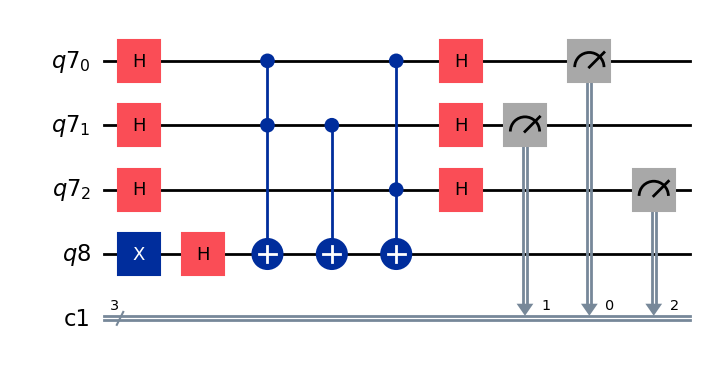

In [7]:
# if the result of measuring the first n qubits gives 0000...0 then the function f is constant.
# else the fucntion f is balanced


def u_f(n=3):

    # f(x0, x1, x2) = x0x1 xor x1 xor x0x2
    # balanced function
    qc = QuantumCircuit(n + 1)
    qc.ccx(0, 1, n)
    qc.cx(1, n)
    qc.ccx(0, 2, n)
    return qc


qubits = 3
qreg = QuantumRegister(qubits)
areg = QuantumRegister(1)
creg = ClassicalRegister(qubits)
qc = QuantumCircuit(qreg, areg, creg)

qc.h(qreg)
qc.x(areg)
qc.h(areg)
qc.compose(u_f(qubits), inplace=True)
qc.h(qreg)

qc.measure(qreg, creg)

qc.draw(output="mpl")

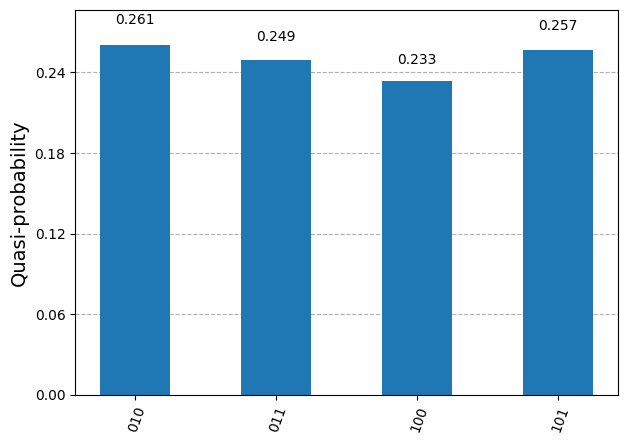

In [8]:
simulator = AerSimulator()
isa_circuit = transpile(qc, simulator)
result = simulator.run(isa_circuit).result()
counts = result.get_counts(isa_circuit)
plot_distribution(counts)